In [1]:
# Linear Regression Practical - House Price Prediction

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("/content/house_prices.csv")

In [3]:
df.head()

,Area_sqft,Bedrooms,Bathrooms,Stories,Parking,Age_years,Price_in_lakhs
0,1000,2,1,1,0,15,50
1,1500,3,2,2,1,10,70
2,1200,2,1,1,1,20,55
3,1800,3,2,2,1,5,85
4,2000,4,3,2,2,8,95


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (10, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10 non-null     int64
 1   Bedrooms        10 non-null     int64
 2   Bathrooms       10 non-null     int64
 3   Stories         10 non-null     int64
 4   Parking         10 non-null     int64
 5   Age_years       10 non-null     int64
 6   Price_in_lakhs  10 non-null     int64
dtypes: int64(7)
memory usage: 692.0 bytes


In [6]:
df.describe()

,Area_sqft,Bedrooms,Bathrooms,Stories,Parking,Age_years,Price_in_lakhs
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,1435.000000,2.600000,1.700000,1.500000,0.900000,13.800000,68.00000
std,359.049672,0.699206,0.674949,0.527046,0.567646,6.033241,16.02082
min,850.000000,2.000000,1.000000,1.000000,0.000000,5.000000,45.00000
25%,1225.000000,2.000000,1.000000,1.000000,1.000000,10.000000,56.25000
50%,1450.000000,2.500000,2.000000,1.500000,1.000000,13.500000,67.50000
75%,1675.000000,3.000000,2.000000,2.000000,1.000000,17.250000,78.75000
max,2000.000000,4.000000,3.000000,2.000000,2.000000,25.000000,95.00000


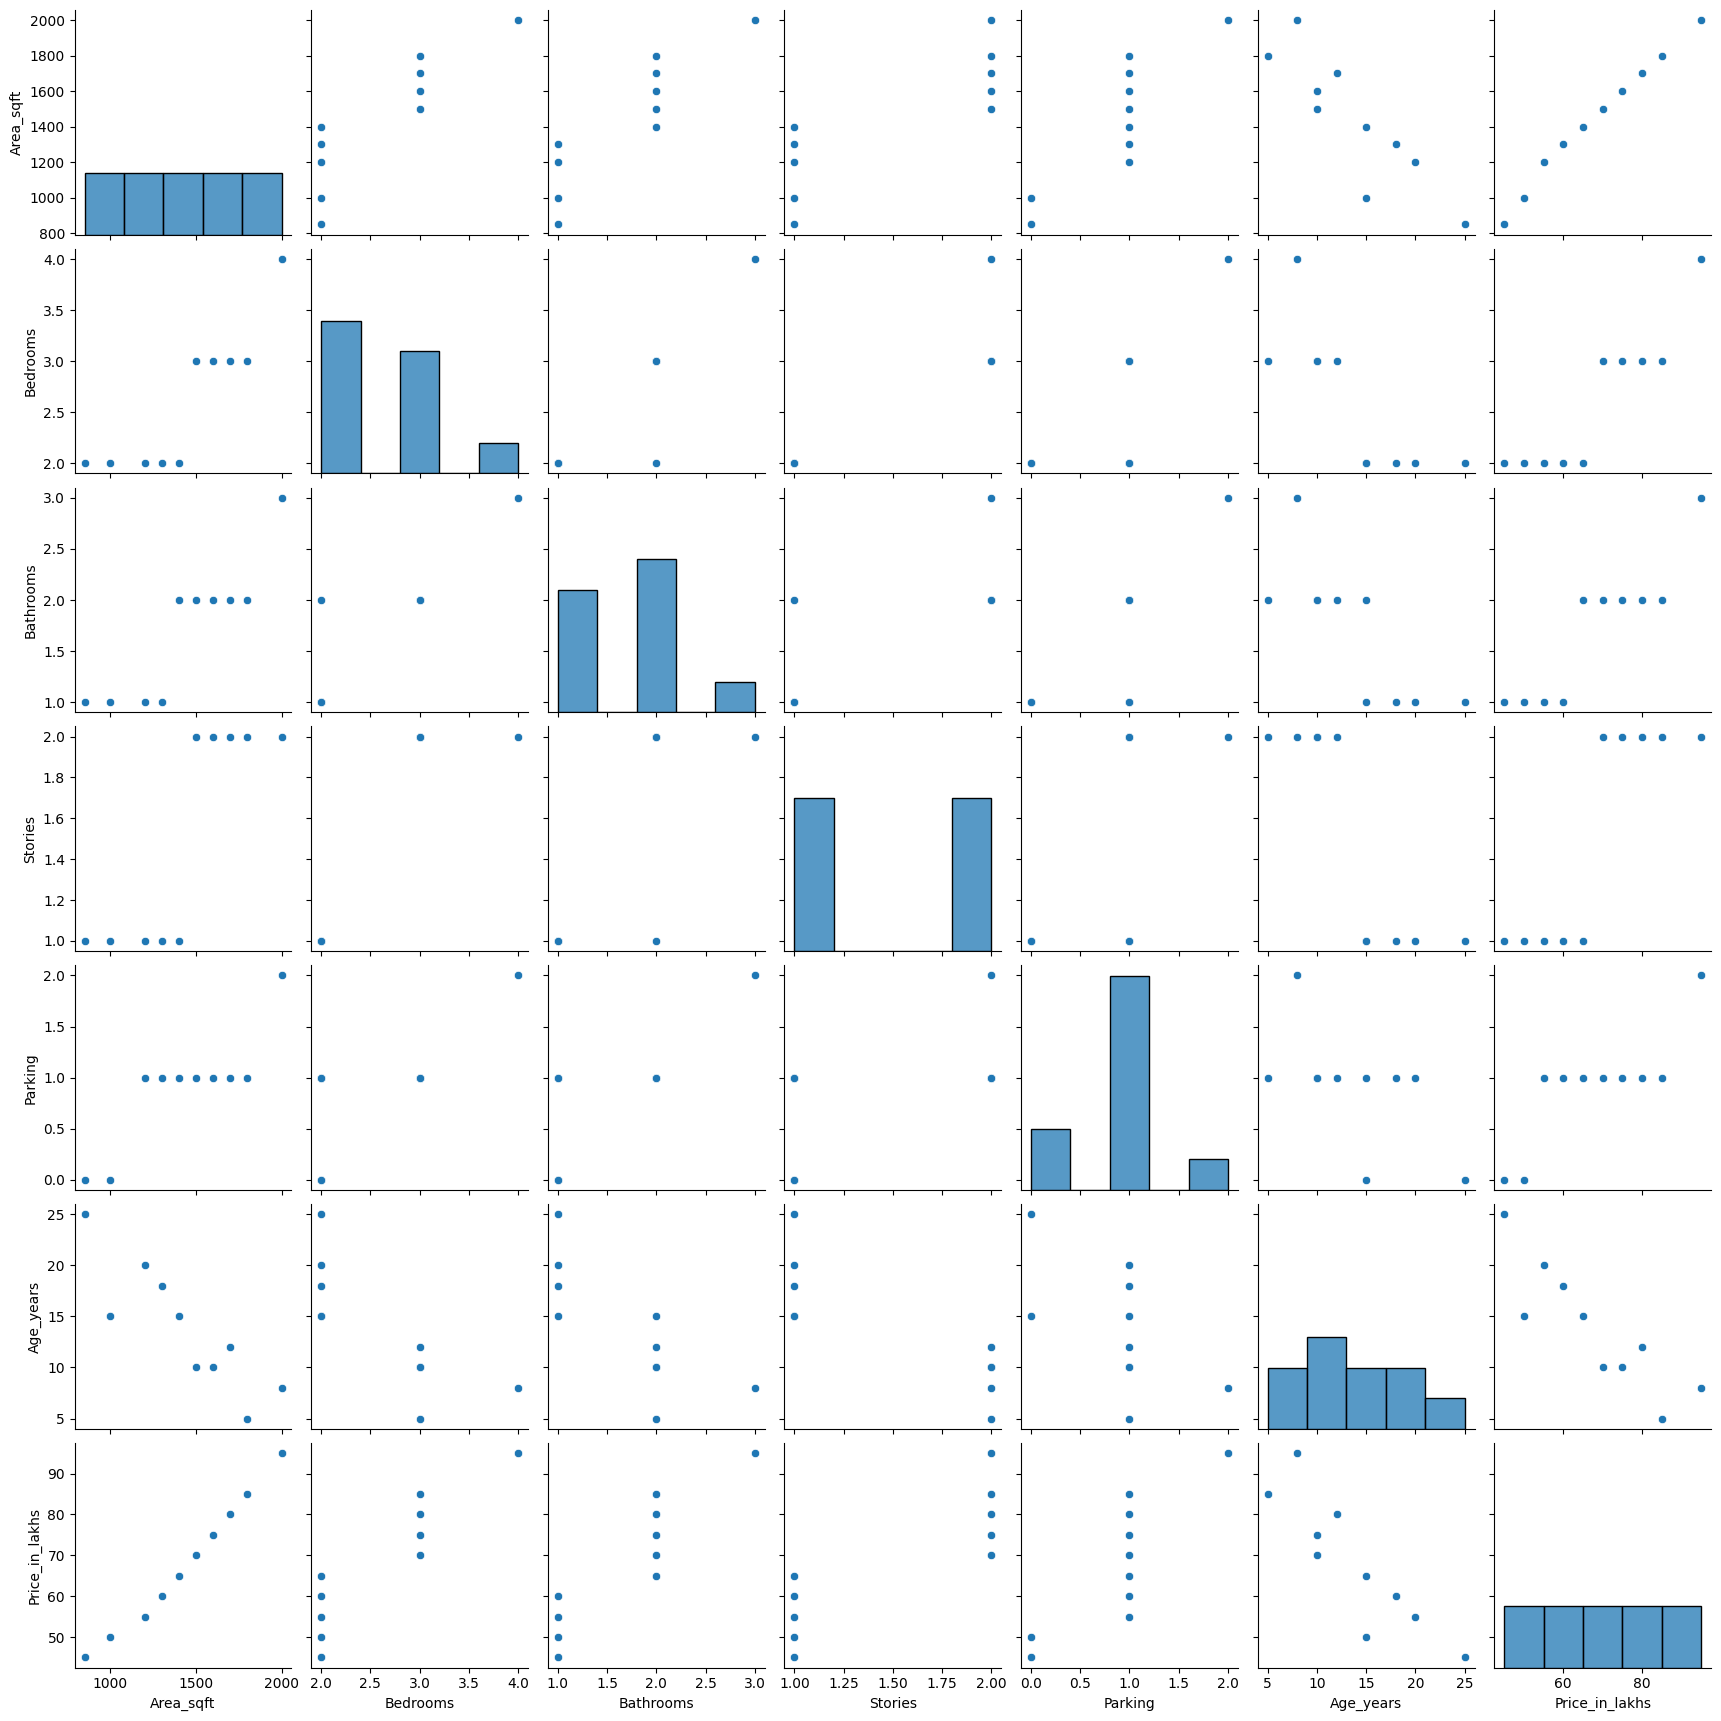

In [7]:
# Visualize relationships
sns.pairplot(df)
plt.show()

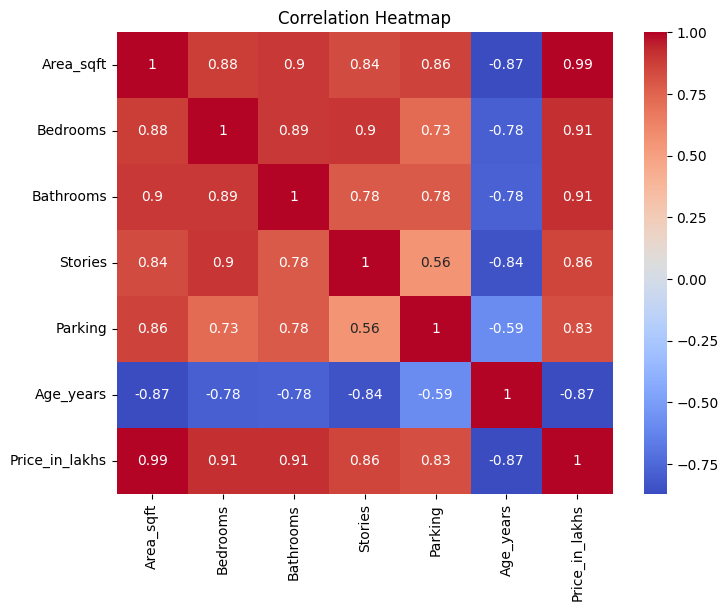

In [8]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Define features (X) and target (y)
X = df[['Area_sqft','Bedrooms','Bathrooms','Stories','Parking','Age_years']]
y = df['Price_in_lakhs']

In [12]:
# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (7, 6)
Testing set size: (3, 6)


In [14]:
# Create & train the Linear Regression model
model = LinearRegression() #y=mx+c
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Model parameters
print("\nIntercept (b0):", model.intercept_)
print("Coefficients (b1, b2, ...):")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.4f}")


Intercept (b0): -5.000000000002814
Coefficients (b1, b2, ...):
Area_sqft: 0.0500
Bedrooms: 5.0000
Bathrooms: 0.0000
Stories: -5.0000
Parking: -5.0000
Age_years: 0.0000


In [16]:
# Predict on test set
y_pred = model.predict(X_test)
print("\nPredicted Prices:", y_pred)
print("Actual Prices:", list(y_test))


Predicted Prices: [75.  70.  42.5]
Actual Prices: [75, 70, 45]


In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) #Residual mean squared error
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2.08
Root Mean Squared Error: 1.44
R² Score: 0.99


In [22]:
# Predict for a new house
# Example: 1600 sqft, 3 bedrooms, 2 bathrooms, 2 stories, 1 parking, 10 years old
new_house = [[1100, 3, 2, 2, 1, 10]]
predicted_price = model.predict(new_house)[0]
print(f"\nPredicted Price for {new_house}: {predicted_price:.2f} lakhs")


Predicted Price for [[1100, 3, 2, 2, 1, 10]]: 50.00 lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Manual Calculation for the new house
manual_pred = model.intercept_ + np.sum(np.array(new_house) * model.coef_)
print(f"Manual Calculation Price: {manual_pred:.2f} lakhs")

Manual Calculation Price: 75.00 lakhs
